In [45]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from IPython.display import HTML, display

Exercise 2

In [46]:
sigma = 10
rho = 28
betta = 8.0 / 3

In [47]:
# (0, 0, 0)

def DFDV_fp(rho):
    return  [
        [-sigma, sigma, 0],
        [rho, -1, 0],
        [0, 0, -betta]
    ]

np.linalg.eig(DFDV_fp(rho))

EigResult(eigenvalues=array([-22.82772345,  11.82772345,  -2.66666667]), eigenvectors=array([[-0.61481679, -0.41650418,  0.        ],
       [ 0.78866997, -0.9091338 ,  0.        ],
       [ 0.        ,  0.        ,  1.        ]]))

In [48]:
# (sqrt(betta(rho - 1)), sqrt(betta(rho - 1)), rho - 1)

def DFDV_sp(rho) :
    return  [
    [-sigma, sigma, 0],
    [1, -1, -np.sqrt(betta*(rho - 1))],
    [np.sqrt(betta*(rho - 1)), np.sqrt(betta*(rho - 1)), -betta]
]

np.linalg.eig(DFDV_sp(rho))

EigResult(eigenvalues=array([-13.85457791 +0.j        ,   0.09395562+10.19450522j,
         0.09395562-10.19450522j]), eigenvectors=array([[ 0.85566502+0.j        , -0.26611932-0.29501017j,
        -0.26611932+0.29501017j],
       [-0.32982275+0.j        ,  0.03212861-0.56907743j,
         0.03212861+0.56907743j],
       [-0.39881615+0.j        , -0.71921356+0.j        ,
        -0.71921356-0.j        ]]))

In [49]:
# (-sqrt(betta(rho - 1)), -sqrt(betta(rho - 1)), rho - 1)

def DFDV_tp(rho) :
    return  [
    [-sigma, sigma, 0],
    [1, -1, np.sqrt(betta*(rho - 1))],
    [-np.sqrt(betta*(rho - 1)), -np.sqrt(betta*(rho - 1)), -betta]
]

np.linalg.eig(DFDV_tp(rho))

EigResult(eigenvalues=array([-13.85457791 +0.j        ,   0.09395562+10.19450522j,
         0.09395562-10.19450522j]), eigenvectors=array([[ 0.85566502+0.j        , -0.26611932-0.29501017j,
        -0.26611932+0.29501017j],
       [-0.32982275+0.j        ,  0.03212861-0.56907743j,
         0.03212861+0.56907743j],
       [ 0.39881615+0.j        ,  0.71921356+0.j        ,
         0.71921356-0.j        ]]))

Exercise 3

In [50]:
rhos = np.arange(5, 51, 5, )
stability_table = []
for rho in rhos:
    stability_table.append([str(rho)])
    print("rho = {0}".format(rho))
    for i, DFDV_Xp in enumerate([DFDV_fp(rho), DFDV_sp(rho), DFDV_tp(rho)]):
        print("\t Point {0}".format(i))
        eigvals = np.linalg.eig(DFDV_Xp).eigenvalues
        print("\t\t", eigvals)
        if(all(value < 0 for value in eigvals.real)):
           stability_table[-1].append("stable")
           print("\t\tstable")
        else:
            stability_table[-1].append("unstable")
            print("\t\tunstable")

rho = 5
	 Point 0
		 [-13.88152731   2.88152731  -2.66666667]
		unstable
	 Point 1
		 [-11.80921801+0.j          -0.92872433+4.14758424j
  -0.92872433-4.14758424j]
		stable
	 Point 2
		 [-11.80921801+0.j          -0.92872433+4.14758424j
  -0.92872433-4.14758424j]
		stable
rho = 10
	 Point 0
		 [-16.4658561    5.4658561   -2.66666667]
		unstable
	 Point 1
		 [-12.47567248+0.j          -0.5954971 +6.17416092j
  -0.5954971 -6.17416092j]
		stable
	 Point 2
		 [-12.47567248+0.j          -0.5954971 +6.17416092j
  -0.5954971 -6.17416092j]
		stable
rho = 15
	 Point 0
		 [-18.54798835   7.54798835  -2.66666667]
		unstable
	 Point 1
		 [-12.96628046+0.j          -0.3501931 +7.58041077j
  -0.3501931 -7.58041077j]
		stable
	 Point 2
		 [-12.96628046+0.j          -0.3501931 +7.58041077j
  -0.3501931 -7.58041077j]
		stable
rho = 20
	 Point 0
		 [-20.34082208   9.34082208  -2.66666667]
		unstable
	 Point 1
		 [-13.35708312+0.j          -0.15479177+8.70866846j
  -0.15479177-8.70866846j]
		stable
	 Poi

In [51]:
def display_table(data):
    html = "<table>"
    for row in data:
        html += "<tr>"
        for field in row:
            html += "<td>%s</td>"%(field)
        html += "</tr>"
    html += "</table>"
    display(HTML(html))

In [52]:
data = [["rho","Point 1", "Point 2", "Point 3"]] + stability_table
display_table(data)

rho,Point 1,Point 2,Point 3
5,unstable,stable,stable
10,unstable,stable,stable
15,unstable,stable,stable
20,unstable,stable,stable
25,unstable,unstable,unstable
30,unstable,unstable,unstable
35,unstable,unstable,unstable
40,unstable,unstable,unstable
45,unstable,unstable,unstable
50,unstable,unstable,unstable


In [64]:
def SYS(t, X):
    dxdt = sigma*(X[1] - X[0])
    dydt = X[0] * (rho - X[2]) - X[1]
    dzdt = X[0] * X[1] - betta*X[2]
    return np.array([dxdt, dydt, dzdt])

def get_fixpoints(rho):
    return [
        [0, 0, 0],
        [np.sqrt(betta*(rho - 1)), np.sqrt(betta*(rho - 1)), rho - 1],
        [-np.sqrt(betta*(rho - 1)), -np.sqrt(betta*(rho - 1)), rho - 1]
    ]

t0 = 0
tbound = 20
first_step = 0.01
bc = [10, 10, 10]
t = np.arange(t0, tbound, first_step)

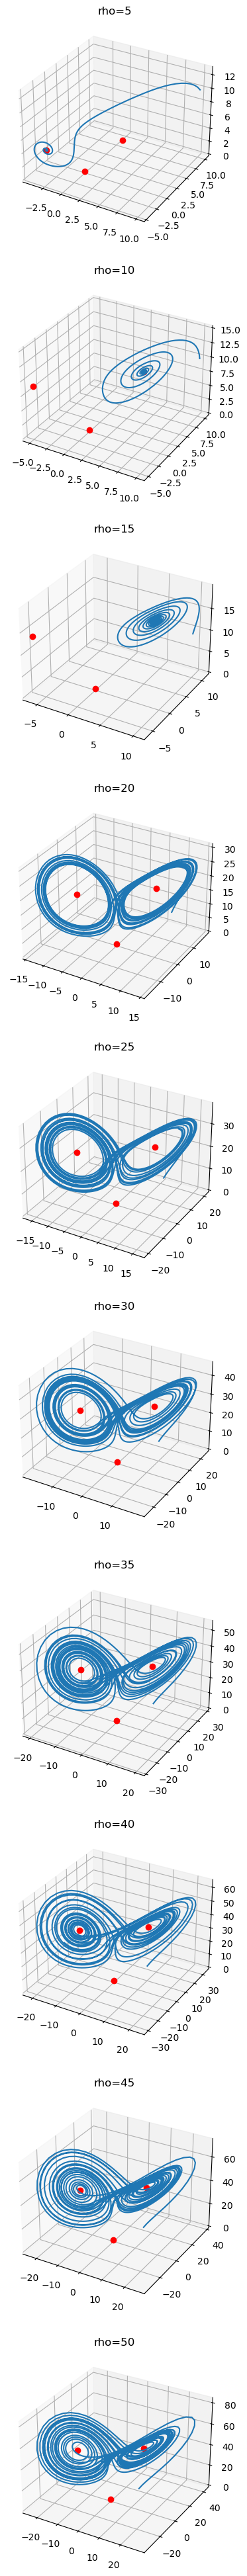

In [65]:
fig, axs = plt.subplots(10, 1, subplot_kw={'projection':'3d'})
fig.set_figheight(50)
fig.set_figwidth(50)

for i, rho in enumerate(rhos):
    ode_solution = sp.integrate.solve_ivp(SYS, (t0, tbound), bc, t_eval=t)
    t = ode_solution.t
    y = ode_solution.y
    fix_points = get_fixpoints(rho)
    for fp in fix_points:
        axs[i].plot(fp[0], fp[1],fp[2], "ro")
    axs[i].plot(y[0, :], y[1, :], y[2, :])
    axs[i].set_title("rho={}".format(rho))
plt.show()
    